## BIOENG-310: Neuroscience Foundations for Engineers

Notebook created by Martin Schrimpf, edited by Alejandro Rodriguez Guajardo and Yingtian Tang.

# Week 4: Preparation -- data loading & basics of data structure

In the computational modeling exercises, we will analyze electrode recordings from rhesus macaques as they view static images.
The **ventral visual stream** in the monkey brain consists of a hierarchical cascade of regions, progressing from the primary visual area (V1) to the secondary visual area (V2), then to the fourth visual area (V4), and finally to the inferior temporal area (IT).
This stream conducts increasingly complex computations, with V1 and V2 processing color and texture, V4 integrating shape and intermediate features, and IT performing high-level object categorization.
We will develop skills to denoise and visualize these neural recordings, probe the information they encode, and construct predictive computational models.

This week, the task is straightforward—we will set up our **environment** to run the *jupyter notebook* on [Google Colab](https://colab.research.google.com/) (upload this *.ipynb* file to the [Google Drive](https://workspace.google.com/products/drive/) and open it).
You should ensure that all dependencies are installed properly and that neuroscientific data can be loaded from Brain-Score.
The specific setup details will be provided below.
Additionally, we include information to help you better understand the **data structure** in Python.

The *jupyter notebook* is a notebook of interleaved [Markdown](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html#markdown-cells) and [Python blocks](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html#code-cells). All of the blocks can be executed: Markdown blocks turn into text (so when they look strange, just execute them); Python blocks execute the code while keeping the variables so they can be used in other Python blocks. You can check more information on the basics of jupyter notebook [starting from this section of the whole webpage](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html#notebook-user-interface).

This notebook consists of the following sessions:
- **Load Data**: load the experimental V1 neural data
- **Stimuli**: load the stimuli used for the recording experiment
- **Basics of DataAssembly**: learn some specifics about the data structure `DataAssembly`
- **Basics of StimulusSet**: learn some specifics about the data structure `StimulusSet`
- **Additional materials**: some extra information, just in case you are interested

Please **execute each block sequentially until the end** (you can skip Additional materials).
This time, your only task is to ensure that everything runs correctly and to read the outputs.
However, we encourage you to explore the data structure and thoroughly understand its operations.
This will establish a strong foundation for progressively more challenging exercises in the future.

Additional hints for using the *jupyter notebook*:
- You can open some temporary Python blocks as your scratchpad.
- Be careful of the ordering of running Python blocks, since the variables are shared.

**Now, we install the dependencies**. You can install them by executing the following block. You should wait for this block to finish before running any other blocks. (The following code might require you to *restart runtime*, which is fine)

In [1]:
!pip install jupyter brainscore-vision matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.9/870.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━

### Load Data

At the current state, it can unfortunately often be difficult to access brain recordings. Not all groups share their data (although new regulations are improving this), and even if the data is accessible it is often difficult to interact with due to non-standard file formats, missing/unclear metadata, and obscure processing pipelines.

That being said, we will here save you the headache by starting from a packaged and standardized dataset.
This data was first published by [Freeman* & Ziemba* et al. 2013](https://www.nature.com/articles/nn.3402) and subsequently packaged into the **[Brain-Score](www.brain-score.org)** platform.
The format of the data here is in [xarray](https://xarray.dev), a structure allowing for multi-dimensional data with multiple metadata along all dimensions. If you know pandas, xarray is the multi-dimensional extension of it. Check basics of xarray [here](https://tutorial.xarray.dev/overview/xarray-in-45-min.html) and pandas [here](https://www.w3schools.com/python/pandas/default.asp), but we will lead you through some of them in the last two sections.

In [1]:
%matplotlib inline
import brainscore_vision

# brainscore will download the data for you
data = brainscore_vision.load_dataset('FreemanZiemba2013.public')

# we'll focus on only V1 recordings in this exercise
v1_data = data.sel(region='V1')

# By just typing the name of a variable, jupyter will show its content (like a 'print' command).
# In this case, the xarray 'v1_data' will be presented with (scroll in the below to have a full view; toggle on the left to show/hide them):
#   1. basics of this data structure: bytes, shape, data type, etc.
#   2. a graphical representation of its different dimensions
#   3. a section called 'coordinates' that shows the names of the dimensions and their associated values
v1_data

/usr/local/lib/python3.11/dist-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):
brainscore-storage/brainio-brainscore/assy_movshon_FreemanZiemba2013_public.nc: 100%|██████████| 1.33G/1.33G [00:18<00:00, 72.7MB/s]
brainscore-storage/brainio-brainscore/stimulus_FreemanZiemba2013_aperture-public.csv: 100%|██████████| 27.9k/27.9k [00:00<00:00, 279kB/s]
brainscore-storage/brainio-brainscore/stimulus_FreemanZiemba2013_aperture-public.zip: 100%|██████████| 5.31M/5.31M [00:00<00:00, 17.0MB/s]


<xarray.NeuronRecordingAssembly 'movshon.FreemanZiemba2013.public' (
                                                                    neuroid_id: 102,
                                                                    time_bin: 300,
                                                                    presentation: 2700)>
dask.array<getitem, shape=(102, 300, 2700), dtype=float64, chunksize=(102, 300, 2700), chunktype=numpy.ndarray>
Coordinates:
  * neuroid_id                 (neuroid_id) int64 1 2 3 4 5 ... 99 100 101 102
  * time_bin                   (time_bin) MultiIndex
  - time_bin_start             (time_bin) int64 0 1 2 3 4 ... 296 297 298 299
  - time_bin_end               (time_bin) int64 1 2 3 4 5 ... 297 298 299 300
  * presentation               (presentation) MultiIndex
  - repetition                 (presentation) int64 0 1 2 3 4 ... 15 16 17 18 19
  - image_id                   (presentation) object 'dfa618e0503a4251582450e...
  - stimulus_id                (presentation) object 'dfa618e0503a4251582450e...
  - sample                     (presentation) int64 2 2 2 2 2 2 ... 2 2 2 2 2 2
  - filename                   (presentation) object 'noise-320x320-im327-smp...
  - image_file_sha1            (presentation) object 'dfa618e0503a4251582450e...
  - image_file_name            (presentation) object 'noise-320x320-im327-smp...
  - texture_family             (presentation) int64 327 327 327 327 ... 71 71 71
  - resolution                 (presentation) object '320x320' ... '320x320'
  - id                         (presentation) int64 133388 133388 ... 133334
  - image_id_without_aperture  (presentation) object '0e8609dc2778a848d7ed8b3...
  - texture_type               (presentation) object 'noise' ... 'texture'
Attributes:
    stimulus_set_identifier:  FreemanZiemba2013.aperture-public
    stimulus_set:                                                  image_id  ...
    identifier:               movshon.FreemanZiemba2013.public

### Stimuli

How did this data come about in the first place? Primate subjects were presented with images while experimenters were recording from early visual cortex.

What are those images?

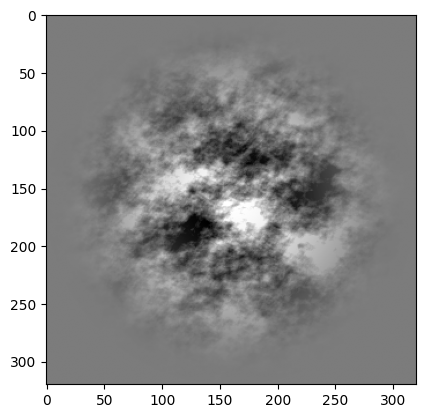

In [2]:
%matplotlib inline
from matplotlib import pyplot, image

# The xarray 'v1_data' has 3 attributes (accesse all of them by 'v1_data.attrs')
#   1. stimulus_set_identifier: name of the stimulus set
#   2. stimulus_set: a brainscore StimulusSet (a subclass of pandas.Dataframe) that records all the information about the stimulus set
#   3. identifier: name of the whole experiment
stimuli = v1_data.stimulus_set

# a shortcut to access the *first* stimulus is in the stimulus set
single_stimulus_id = stimuli['stimulus_id'].values[0]

# use a method 'get_stimulus' of StimulusSet to get the stimulus storage path given the id
image_path = stimuli.get_stimulus(single_stimulus_id)

# show the image using matplotlib
image_content = image.imread(image_path)
pyplot.imshow(image_content, cmap='gray')
pyplot.show()

### Basics of DataAssembly

Let's take a closer look at the `v1_data` and `stimuli` we got, starting with `v1_data`.

In [23]:
# the 'type' function returns the 'Class' of a Python variable, i.e., its data structure.
# reference: https://www.w3schools.com/python/python_classes.asp
class_of_v1_data = type(v1_data)
class_of_v1_data

brainio.assemblies.NeuronRecordingAssembly

In [25]:
# ignore this code if you cannot understand it immediately
print(f"The ancestor of NeuronRecordingAssembly is {class_of_v1_data.__bases__[0].__bases__[0].__bases__[0]}.")

The ancestor of NeuronRecordingAssembly is <class 'xarray.core.dataarray.DataArray'>.


We can see that the `v1_data` has a class named `NeuronRecordingAssembly`.

This `NeuronRecordingAssembly` inherits from `xarray.DataArray`, so it shares all the methods and operations of `xarray.DataArray`.

Let's see some basic operations in the following. We only show 'sizes' of some xarrays, but you can open up a new Python block to check the full information yourself.

In [ ]:
import xarray as xr
import numpy as np


# checking the shape of the DataArray
print("\n* Shape of v1_data:")
print(v1_data.shape)
print(v1_data.sizes)

# accessing data values in v1_data
print("\n* Data stored in v1_data is a numpy array:")
print(type(v1_data.values))

# indexing: select a specific element
print("\n* Slice at neuroid_id=102:")
print(v1_data.sel(neuroid_id=102).sizes)

# slicing: select a set along the 'neuroid_id' axis
print("\n* Slice at neuroid_id=1 and 99:")
print(v1_data.sel(neuroid_id=[1, 99]).sizes)

# slicing: select a range along the 'time_bin' axis
print("\n* Slice at from 50ms~110ms:")
print(v1_data.where((v1_data.time_bin_start>=50)&(v1_data.time_bin_end<=110), drop=True).sizes)

# arithmetic operation: adding 1 to all elements
print("\n* DataArray after adding 10:")
v1_data_plus_10 = v1_data + 10
print(f"The first element changed from {v1_data.values[0,0,0]} to {v1_data_plus_10.values[0,0,0]}")

# apply function: Mean along 'time_bin' axis
print("\n* Mean along 'time_bin' axis:")
print(v1_data.mean(dim='time_bin').sizes)

# groupby the stimulus_id and take the mean of each group
print("\n* Sizes after averaging within groups that share the same stimulus id:")
print(v1_data.groupby('stimulus_id').mean().sizes)

# accessing coordinates along 'presentation' axis
print("\n* Coordinates along 'presentation' axis:")
print(v1_data['presentation'].coords)


# see more information about xr.DataArray: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html
# see more xarray operations: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html


* Shape of v1_data:
(102, 300, 2700)
Frozen({'neuroid_id': 102, 'time_bin': 300, 'presentation': 2700})

* Data stored in v1_data is a numpy array:
<class 'numpy.ndarray'>

* Slice at neuroid_id=102, time_bin=200ms:
Frozen({'time_bin_end': 1, 'presentation': 2700})

* Slice at neuroid_id=1 and 99:
Frozen({'neuroid_id': 2, 'time_bin': 300, 'presentation': 2700})

* DataArray after adding 10:
The first element changed from 0.0 to 10.0

* Mean along 'time_bin' axis:
Frozen({'neuroid_id': 102, 'presentation': 2700})

* Sizes after averaging within groups that share the same stimulus id:
Frozen({'neuroid_id': 102, 'time_bin': 300, 'stimulus_id': 135})

* Coordinates along 'presentation' axis:
Coordinates:
  * presentation               (presentation) MultiIndex
  - repetition                 (presentation) int64 0 1 2 3 4 ... 15 16 17 18 19
  - image_id                   (presentation) object 'dfa618e0503a4251582450e...
  - stimulus_id                (presentation) object 'dfa618e0503a4251

The coordinates along the `presentation` dimension encode different aspects of each 'presentation' or experimental trial.
For example, `stimulus_id` represents the specific image used in the trial, while `repetition` indicates which repetition of the image is presented to the monkey, starting from 0. Notice that when we average over the repetitions of the same stimulus, we eventually get 135 unique stimuli.

Try to investigate the `coords` more and answer the following questions (answers will be shown in the section of Additional materials):

1. How many presentation trials?
2. How many neural sites?
3. The temporal resolution of the recording is 1 ms per time bin. Then, how long is each trial?
4. Each *neural site* is recorded using a single quartz-platinum-tungsten microelectrode implanted in the macaque brain. Do you think each neural site records the activity of a single neuron, or could it capture signals from multiple neurons? Explain your reasoning.

The xarray also has another attribute called `attrs`, which is a dictionary-like object that records some additional information.

In [48]:
for key, value in v1_data.attrs.items():
  print(f"The attribute {key} exists.")

v1_data_attributes = v1_data.attrs
print()
print(f"The id of the whole experiment is {v1_data_attributes['identifier']}.")
print(f"The id of stimulus set is {v1_data_attributes['stimulus_set_identifier']}.")
print(f"The stimulus set is a {type(v1_data_attributes['stimulus_set'])}.")

The attribute stimulus_set_identifier exists.
The attribute stimulus_set exists.
The attribute identifier exists.

The id of the whole experiment is movshon.FreemanZiemba2013.public.
The id of stimulus set is FreemanZiemba2013.aperture-public.
The stimulus set is a <class 'brainio.stimuli.StimulusSet'>.


Here, we can observe the identifiers for both the experiment and the stimulus set.
Since one stimulus set can be used across multiple experiments, the two identifiers are kept separate.

We saw that the `stimulus_set` is the instance of a Class called `StimulusSet`. Let's check it in the next section.

### Basics of StimulusSet

Here we check the `stimuli`.

In [59]:
stimuli = v1_data_attributes['stimulus_set']
stimuli

,image_id,sample,filename,image_file_sha1,image_file_name,texture_family,resolution,id,image_id_without_aperture,texture_type,stimulus_id
0,21041db1f26c142812a66277c2957fb3e2070916,5,noise-320x320-im38-smp5.png,21041db1f26c142812a66277c2957fb3e2070916,noise-320x320-im38-smp5.png,38,320x320,133032,6ddcf4b55f9151ac77250706510dcd00fdfb466e,noise,21041db1f26c142812a66277c2957fb3e2070916
1,0d9074b184dd4abbd8dd79500d8869e90e3759f0,15,tex-320x320-im393-smp15.png,0d9074b184dd4abbd8dd79500d8869e90e3759f0,tex-320x320-im393-smp15.png,393,320x320,133033,cd5d18cc4d174dc89d9c07951c208fdceb568ac2,texture,0d9074b184dd4abbd8dd79500d8869e90e3759f0
2,28528e98f687f3790cb2d35ef1374aef0ff12bb9,3,tex-320x320-im30-smp3.png,28528e98f687f3790cb2d35ef1374aef0ff12bb9,tex-320x320-im30-smp3.png,30,320x320,133035,95689155a87077e7a5c5dfd93aa8cdf51da16e04,texture,28528e98f687f3790cb2d35ef1374aef0ff12bb9
3,22eb327d95d9d18fc3cfdb3cb7122e49eb8cd5b9,13,noise-320x320-im18-smp13.png,22eb327d95d9d18fc3cfdb3cb7122e49eb8cd5b9,noise-320x320-im18-smp13.png,18,320x320,133040,ac2a808a4bd86810f4ae9aedce65e1ec79e03ba4,noise,22eb327d95d9d18fc3cfdb3cb7122e49eb8cd5b9
4,5a49c84be5539e3b1b7b4f767c74b1355cf5145a,12,noise-320x320-im18-smp12.png,5a49c84be5539e3b1b7b4f767c74b1355cf5145a,noise-320x320-im18-smp12.png,18,320x320,133041,8278ab60ef19334b2dc54fa0b06091a968ef703d,noise,5a49c84be5539e3b1b7b4f767c74b1355cf5145a
...,...,...,...,...,...,...,...,...,...,...,...
130,65a263b58b098973995a40d39785f1776b3e757d,7,noise-320x320-im327-smp7.png,65a263b58b098973995a40d39785f1776b3e757d,noise-320x320-im327-smp7.png,327,320x320,133468,01e8fc3aebd53914cc4c0a9321a8759054bd79f3,noise,65a263b58b098973995a40d39785f1776b3e757d
131,1e4309bec2dc7f15d30dcb5768d6f5ae06928086,8,noise-320x320-im38-smp8.png,1e4309bec2dc7f15d30dcb5768d6f5ae06928086,noise-320x320-im38-smp8.png,38,320x320,133469,81581e8d38dec64d3746851aa4e45e33457d0bf8,noise,1e4309bec2dc7f15d30dcb5768d6f5ae06928086
132,bad7530828a8c6aab2ebaa83f34a1353efe0c395,6,noise-320x320-im56-smp6.png,bad7530828a8c6aab2ebaa83f34a1353efe0c395,noise-320x320-im56-smp6.png,56,320x320,133470,43de5603b357dce25a030bbc3611abdaef5cb805,noise,bad7530828a8c6aab2ebaa83f34a1353efe0c395
133,b429ff650a6f868b5124cc04c6d79ec69fb35c73,6,tex-320x320-im48-smp6.png,b429ff650a6f868b5124cc04c6d79ec69fb35c73,tex-320x320-im48-smp6.png,48,320x320,133472,844305832982a3f3482d2fbf1e36edaeb1528387,texture,b429ff650a6f868b5124cc04c6d79ec69fb35c73


We see a nice table that includes information on each stimulus in the stimulus set.
In fact, the Class `StimulusSet` inherits from `pandas.DataFrame`.
This is a commonly used data structure in data science.

In [61]:
# ignore this code if you cannot understand it immediately
print(f"The ancestor of StimulusSet is {type(stimuli).__bases__[0]}.")

The ancestor of StimulusSet is <class 'pandas.core.frame.DataFrame'>.


Let's look at some basics of the `pandas.DataFrame`.

In [ ]:
# checking the shape of the DataFrame
print("\n* Shape of the stimuli DataFrame:")
print(stimuli.shape)

# data stored in DataFrame is also numpy array
print("\n* Values of DataFrame:")
print(type(stimuli.values))

# selecting rows by index
print("\n* First row:")
print(stimuli.iloc[0])

# accessing the first element of the 'image_id' column
print("\n* First element in the 'image_id' column (first way):")
print(stimuli['image_id'].iloc[0])

# accessing the first element of the 'image_id' column
print("\n* First element in the 'image_id' column (second way):")
print(stimuli.loc[0, 'image_id'])

# slicing rows and columns
print("\n* Slicing two rows and two columns (first way):")
print(stimuli.loc[[0,1], ['texture_type', 'image_id']])

# slicing rows and columns
print("\n* Slicing two rows and two columns (second way):")
print(stimuli.iloc[:2, [0,9]])

# filter rows based on a condition
print("\n* Rows where 'texture_type' is 'noise':")
print(stimuli[stimuli['texture_type'] == 'noise'].shape)


# more pandas operations: https://pandas.pydata.org/docs/user_guide/basics.html#basics


* shape of the stimuli DataFrame:
(135, 11)

* values of DataFrame:
<class 'numpy.ndarray'>

* first row:
image_id                     21041db1f26c142812a66277c2957fb3e2070916
sample                                                              5
filename                                  noise-320x320-im38-smp5.png
image_file_sha1              21041db1f26c142812a66277c2957fb3e2070916
image_file_name                           noise-320x320-im38-smp5.png
texture_family                                                     38
resolution                                                    320x320
id                                                             133032
image_id_without_aperture    6ddcf4b55f9151ac77250706510dcd00fdfb466e
texture_type                                                    noise
stimulus_id                  21041db1f26c142812a66277c2957fb3e2070916
Name: 0, dtype: object

* first element in the 'image_id' column:
21041db1f26c142812a66277c2957fb3e2070916

* first element

Besides the functionality inherited from `pandas.DataFrame`, the `StimulusSet` also has a dictionary-like attributed called `stimulus_paths`.

It stores the mapping from the `stimulus_id` to the actual storage path.

The path of 21041db1f26c142812a66277c2957fb3e2070916 is /root/.brainio/stimulus_FreemanZiemba2013_aperture-public/noise-320x320-im38-smp5.png.


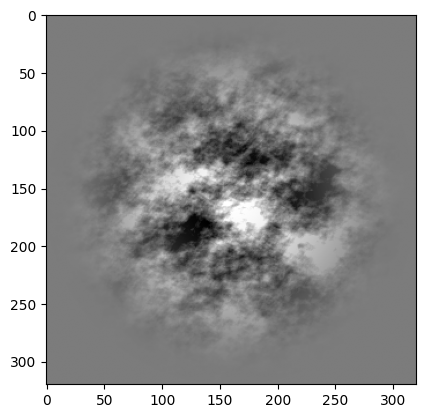

In [101]:
# let's get the image path of this specific image
image_id = '21041db1f26c142812a66277c2957fb3e2070916'

# access the image_path by:
# first way - access the value of the corresponding key in the dictionary
image_path = stimuli.stimulus_paths[image_id]
# second way - use the 'get_stimulus' api of 'StimulusSet'
image_path = stimuli.get_stimulus(image_id)

print(f"The path of {image_id} is {image_path}.")

# show the image
pyplot.imshow(image.imread(image_path), cmap='gray')

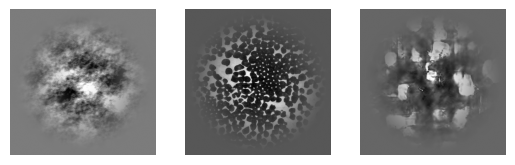

In [102]:
# let's show a few more by using the iterrows function of pandas.DataFrame
limit = 3
fig, axes = pyplot.subplots(ncols=limit)
for i, row in stimuli.iterrows():
  if i == limit: break
  image_id = row['image_id']
  image_path = stimuli.get_stimulus(image_id)
  axes[i].imshow(image.imread(image_path), cmap='gray')
  axes[i].axis('off')

### Additional materials

#### Answers of the question on coordinates

Let's get a basic understanding of the neural recording by examining the *coordinates*.

How many presentation trials? --> 2700 (20 repetitions per image and 135 unique images).

How many neural sites? --> 102 sites in V1.

The temporal resolution of the recording is 1 ms per time bin. Then, how long is each trial? --> 300ms.

Each *neural site* is recorded using a single quartz-platinum-tungsten microelectrode implanted in the macaque brain. Do you think each neural site records the activity of a single neuron, or could it capture signals from multiple neurons? Explain your reasoning. --> The electrodes capture both action potentials (single-unit activity) from nearby neurons and local field potentials (LFPs), which reflect the summed synaptic activity of multiple neurons.

#### Accessing ancestors

In [22]:
# here, we show how we access all the 'ancestors' of NeuronRecordingAssembly.
# reference: https://www.w3schools.com/python/python_inheritance.asp

# the Class of 'v1_data' is NeuronRecordingAssembly, which is a subclass of NeuroidAssembly.
print(f"The parents of NeuronRecordingAssembly are {class_of_v1_data.__bases__}")  # __bases__ returns the parents of a Class as a 'tuple'

# the NeuroidAssembly is a subclass of DataAssembly
print(f"The parents of NeuroidAssembly are {class_of_v1_data.__bases__[0].__bases__}")  # '[0]' accesses the first element in the 'tuple'

# the DataAssembly is a subclass of xarray
print(f"The parents of DataAssembly are {class_of_v1_data.__bases__[0].__bases__[0].__bases__}")  # keep accessing the parents

The parents of NeuronRecordingAssembly are (<class 'brainio.assemblies.NeuroidAssembly'>,)
The parents of NeuroidAssembly are (<class 'brainio.assemblies.DataAssembly'>,)
The parents of DataAssembly are (<class 'xarray.core.dataarray.DataArray'>,)
